In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data 
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import r2_score

In [99]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['AFRM']
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2022,12,15)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%%**********************]  1 of 1 completed


In [54]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,11.259643,11.348214,11.250000,11.300000,9.591400,461750800
2010-12-02,11.340357,11.392857,11.246071,11.362500,9.644452,462837200
2010-12-03,11.321786,11.380357,11.297857,11.337143,9.622930,342092800
2010-12-06,11.380000,11.511786,11.372143,11.433929,9.705078,448481600
2010-12-07,11.564286,11.571071,11.361429,11.364643,9.646272,391454000


In [55]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.043976,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.556061,76097000
2022-12-12,142.699997,144.500000,141.059998,144.490005,143.876160,70462700
2022-12-13,149.500000,149.970001,144.240005,145.470001,144.852005,93886200
2022-12-14,145.350006,146.660004,141.160004,143.210007,142.601593,82291200


In [56]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,11.259643,11.348214,11.250000,11.300000,9.591400,461750800
1,2010-12-02,11.340357,11.392857,11.246071,11.362500,9.644452,462837200
2,2010-12-03,11.321786,11.380357,11.297857,11.337143,9.622930,342092800
3,2010-12-06,11.380000,11.511786,11.372143,11.433929,9.705078,448481600
4,2010-12-07,11.564286,11.571071,11.361429,11.364643,9.646272,391454000


In [57]:
df=df.drop(['Date', 'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,11.259643,11.348214,11.250000,11.300000,461750800
1,11.340357,11.392857,11.246071,11.362500,462837200
2,11.321786,11.380357,11.297857,11.337143,342092800
3,11.380000,11.511786,11.372143,11.433929,448481600
4,11.564286,11.571071,11.361429,11.364643,391454000


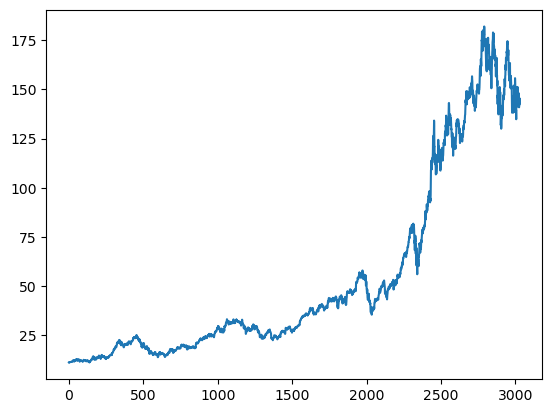

In [58]:
plt.plot(df.Close)

In [59]:
df

,Open,High,Low,Close,Volume
0,11.259643,11.348214,11.250000,11.300000,461750800
1,11.340357,11.392857,11.246071,11.362500,462837200
2,11.321786,11.380357,11.297857,11.337143,342092800
3,11.380000,11.511786,11.372143,11.433929,448481600
4,11.564286,11.571071,11.361429,11.364643,391454000
...,...,...,...,...,...
3026,142.360001,143.520004,141.100006,142.649994,62128300
3027,142.339996,145.570007,140.899994,142.160004,76097000
3028,142.699997,144.500000,141.059998,144.490005,70462700
3029,149.500000,149.970001,144.240005,145.470001,93886200


In [60]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3026    152.723399
3027    152.614599
3028    152.505999
3029    152.419799
3030    152.322400
Name: Close, Length: 3031, dtype: float64

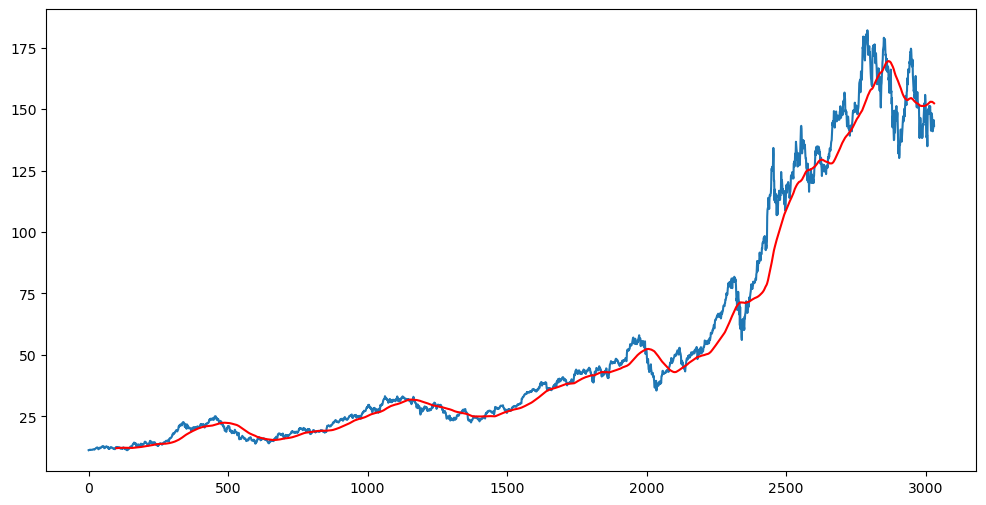

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [62]:
ma200=df.Close.rolling(100).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3026    152.723399
3027    152.614599
3028    152.505999
3029    152.419799
3030    152.322400
Name: Close, Length: 3031, dtype: float64

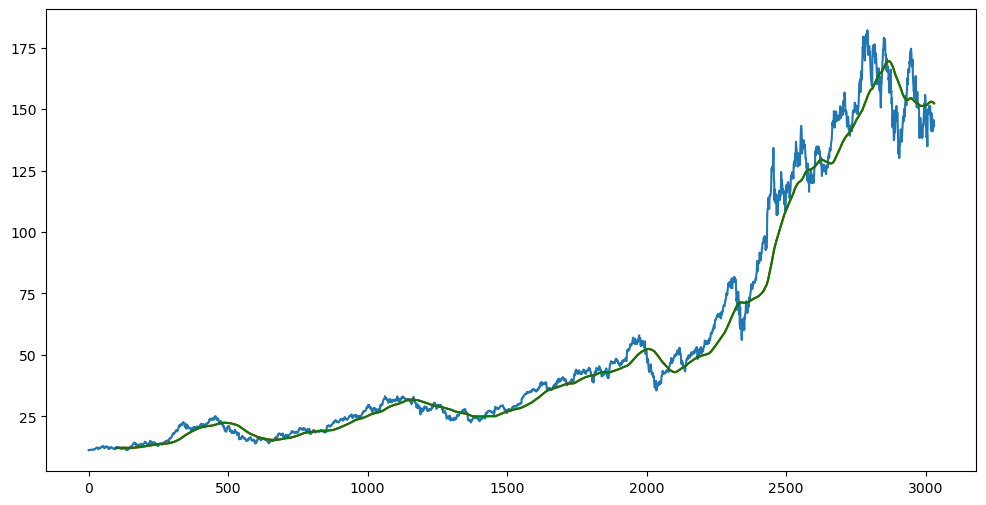

In [63]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [64]:
df.shape

(3031, 5)

In [65]:
# splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.75):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2273, 1)
(758, 1)


In [66]:
data_training.head()

,Close
0,11.300000
1,11.362500
2,11.337143
3,11.433929
4,11.364643


In [67]:
data_testing.head()

,Close
2273,67.864998
2274,68.787498
2275,69.964996
2276,70.102501
2277,69.934998


In [68]:
scaler=MinMaxScaler(feature_range=(0,1))

In [69]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[6.83512803e-04],
       [1.79105873e-03],
       [1.34170969e-03],
       ...,
       [9.82943901e-01],
       [9.89854977e-01],
       [1.00000000e+00]])

In [71]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train= np.array(x_train), np.array(y_train)


In [75]:
#ML model

model= Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_3 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 120)         

In [78]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
68/68 [==============================] - 54s 634ms/step - loss: 0.0660
Epoch 2/30
68/68 [==============================] - 40s 591ms/step - loss: 0.0558
Epoch 3/30
68/68 [==============================] - 39s 574ms/step - loss: 0.0546
Epoch 4/30
68/68 [==============================] - 40s 582ms/step - loss: 0.0539
Epoch 5/30
68/68 [==============================] - 39s 573ms/step - loss: 0.0534
Epoch 6/30
68/68 [==============================] - 39s 574ms/step - loss: 0.0534
Epoch 7/30
68/68 [==============================] - 39s 574ms/step - loss: 0.0533
Epoch 8/30
68/68 [==============================] - 39s 575ms/step - loss: 0.0530
Epoch 9/30
68/68 [==============================] - 39s 570ms/step - loss: 0.0526
Epoch 10/30
68/68 [==============================] - 40s 586ms/step - loss: 0.0530
Epoch 11/30
68/68 [==============================] - 77s 1s/step - loss: 0.0526
Epoch 12/30
68/68 [==============================] - 46s 675ms/step - loss: 0.0524
Epoch 13/30
68/6

In [79]:
model.save('keras_model.h5')

C:\Users\91939\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
data_testing.head()

,Close
2273,67.864998
2274,68.787498
2275,69.964996
2276,70.102501
2277,69.934998


In [81]:
past_100_days=data_training.tail(100)

In [82]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\91939\AppData\Local\Temp\ipykernel_3348\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [83]:
final_df.head()

,Close
0,52.209999
1,52.167500
2,51.755001
3,51.935001
4,52.419998


In [85]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02898822],
       [0.02867029],
       [0.02558446],
       [0.02693101],
       [0.03055919],
       [0.02887601],
       [0.03684309],
       [0.02822143],
       [0.01997383],
       [0.        ],
       [0.00684497],
       [0.01066018],
       [0.01887039],
       [0.01430711],
       [0.01335328],
       [0.02923135],
       [0.01759866],
       [0.01570976],
       [0.02461194],
       [0.03181225],
       [0.03183094],
       [0.03609501],
       [0.03575839],
       [0.01739294],
       [0.02459325],
       [0.02023566],
       [0.02279784],
       [0.02930615],
       [0.02880122],
       [0.02311577],
       [0.0296428 ],
       [0.03729195],
       [0.03725453],
       [0.03895643],
       [0.04368805],
       [0.05657378],
       [0.05563868],
       [0.04752198],
       [0.04967271],
       [0.05116888],
       [0.05504023],
       [0.05165515],
       [0.04561436],
       [0.04746588],
       [0.04552085],
       [0.05178605],
       [0.04965402],
       [0.047

In [86]:
input_data.shape

(858, 1)

In [87]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [88]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(758, 100, 1)
(758,)


In [89]:
# making predictions

y_predicted= model.predict(x_test)

24/24 [==============================] - 5s 149ms/step


In [90]:
y_predicted.shape

(758, 100, 1)

In [91]:
y_test

array([0.14610061, 0.15300168, 0.16181035, 0.16283899, 0.16158593,
       0.16210959, 0.16102489, 0.16955303, 0.17005797, 0.18060597,
       0.18040021, 0.18361697, 0.18760053, 0.20013094, 0.19466991,
       0.19910229, 0.19646535, 0.20544232, 0.21748646, 0.21879558,
       0.23119506, 0.22319057, 0.2206845 , 0.2279783 , 0.23450537,
       0.23046571, 0.23257905, 0.23544047, 0.23371985, 0.21621474,
       0.23256033, 0.2449972 , 0.2441182 , 0.21726205, 0.21567236,
       0.23472978, 0.23959233, 0.24662427, 0.23693661, 0.23977931,
       0.2361511 , 0.25034603, 0.24598841, 0.24613806, 0.2350103 ,
       0.24365065, 0.23744155, 0.22388254, 0.19607256, 0.17718346,
       0.18573032, 0.14995324, 0.149654  , 0.1972508 , 0.17950255,
       0.20460071, 0.18623531, 0.17896018, 0.13620726, 0.1720591 ,
       0.15352534, 0.1026557 , 0.15827568, 0.09139707, 0.11131477,
       0.09973818, 0.09620349, 0.06714047, 0.05803254, 0.10013093,
       0.09758745, 0.12175053, 0.10173931, 0.11496167, 0.11398

In [92]:
y_predicted

array([[[0.3018797 ],
        [0.32241526],
        [0.3255007 ],
        ...,
        [0.31750914],
        [0.3175096 ],
        [0.31751013]],

       [[0.30187947],
        [0.32241368],
        [0.325499  ],
        ...,
        [0.3175096 ],
        [0.31751013],
        [0.31751084]],

       [[0.30187714],
        [0.32241133],
        [0.32549688],
        ...,
        [0.31751013],
        [0.31751084],
        [0.3175118 ]],

       ...,

       [[0.30300194],
        [0.32478094],
        [0.32855237],
        ...,
        [0.32616615],
        [0.32614657],
        [0.32612088]],

       [[0.3029919 ],
        [0.32475802],
        [0.32852054],
        ...,
        [0.32614657],
        [0.32612088],
        [0.3260927 ]],

       [[0.3029828 ],
        [0.32473493],
        [0.32850248],
        ...,
        [0.32612088],
        [0.3260927 ],
        [0.32606593]]], dtype=float32)

In [93]:
scaler.scale_

array([0.00748083])

In [96]:
scale_factor= 1/0.02099517
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

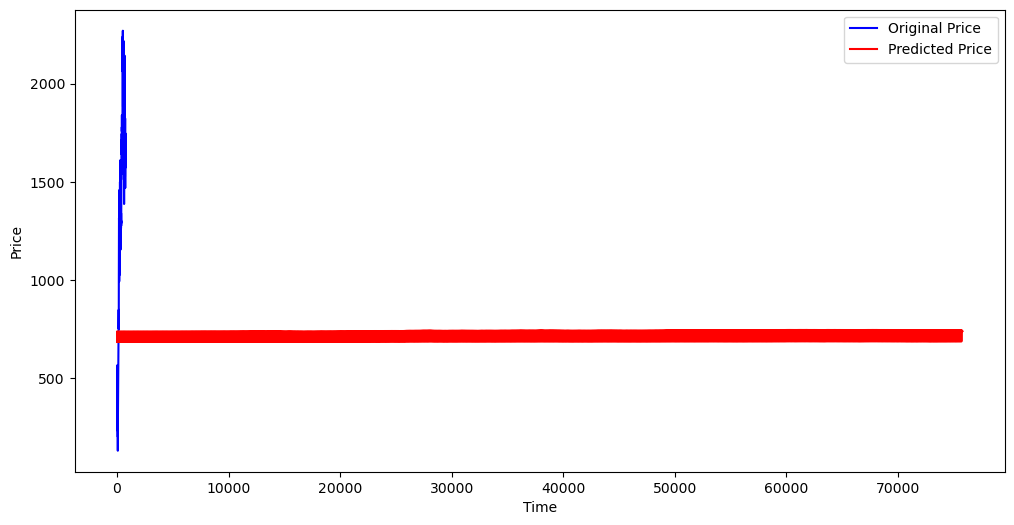

In [98]:
plt.figure(figsize=(12,6))
plt.plot(y_test.reshape(-1), 'b', label= 'Original Price')
plt.plot(y_predicted.reshape(-1), 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()
plt.show()